# 3. Script for conducting sentiment analysis on comment corpora

## Set Up

In [42]:
import pandas as pd

In [43]:
pd.set_option('display.max_colwidth', None)

In [44]:
path = "C:\\Users\\nicol\\Documents\\2021-2022\\QMSS\\Spring'22\\QMSS 5999 Thesis\\data\\"

# Import comment data
reddit = pd.read_csv(path+'comments_reddit_all.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'})
fb = pd.read_csv(path+'comments_fb_all.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'})
fb = fb[['comment_id', 'text']]

In [45]:
display(reddit.head())
display(reddit.shape)
display(fb.head())
display(fb.shape)

,comment_id,text
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO
1,gww5jfz,&gt; This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31.\n\nImportant to take note!!
2,gww68ne,phase 2 lai liao wah shag
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. \n\nEveryone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. \n\nFuck this shit"
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;


(9112, 2)

,comment_id,text
0,10157877630867115,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.
1,10157877561317115,"Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens."
2,10157877564117115,Haiz.. no apologies for importing cases. All your doing leh garmen. I'm going to have a friendly chat with my MP!
3,10157877557412115,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!
4,10157877555032115,Blaming us for not following safe distancing measures again instead of blaming themselves.


(6607, 2)

## Preprocessing text

### Clean text

In [46]:
# Function for cleaning text
def clean_text_sa(text):
    import re
    import html
    text1 = html.unescape(text) # remove HTML encoded characters
    text2 = re.sub(r'â€™', '\'', text1) # replce â€™ with apostrophe
    text3 = re.sub(r'\n', ' ', text2) # replace line breaks with spaces
    text4 = re.sub(r'#\S+', '', text3) # remove hashtags
    text5 = re.sub(r'http\S+', '', text4) # remove links starting with http
    text6 = re.sub(r'\S+\.com\S+', '', text5) # remove links not starting with http
    return(text6)

In [47]:
# Apply function to DataFrames
reddit['text_clean_sa'] = reddit.text.apply(clean_text_sa)
fb['text_clean_sa'] = fb.text.apply(clean_text_sa)

### Replacing words/phrases according using self-built dictionary

In [48]:
# Import dictionary
dict_clean_df = pd.read_csv(path+'dict.csv', keep_default_na=False)
dict_clean = dict(dict_clean_df.values)

In [49]:
dict_clean

{'cb': '',
 'CB': '',
 'Cb': '',
 'ya': 'yes',
 'YA': 'YES',
 'Ya': 'Yes',
 'yea': 'yes',
 'YEA': 'yes',
 'Yea': 'Yes',
 'ye': 'yes',
 'Ye': 'yes',
 'YE': 'YES',
 'ur': 'your',
 'UR': 'your',
 'u': 'you',
 'U': 'YOU',
 'yr': 'year',
 'im ': "I'm",
 'IM ': "I'm",
 'ang moh': 'Caucasians',
 'Ang Moh': 'Caucasians',
 'sia suay': 'disgraceful',
 'Sia Suay': 'Disgraceful',
 'Sia suay': 'disgraceful',
 'SIA SUAY': 'DISGRACEFUL',
 'gov': 'government',
 'govt': 'government',
 'Gov': 'government',
 'Govt': 'Government',
 "gov't": 'government',
 "Gov't": 'Government',
 'ktv': 'karaoke',
 'KTV': 'karaoke',
 'kTV': 'karaoke',
 'ktvs': 'karaoke',
 'KTVs': 'karaoke',
 'Ktvs': 'karaoke',
 'ppl': 'people',
 'sg': 'Singapore',
 'SG': 'Singapore',
 'mrt': 'subway',
 'MRT': 'subway',
 'Mrt': 'subway',
 'icu': 'hospital',
 'ICU': 'hospital',
 'pls': 'please',
 'PLS': 'please',
 'WFH': 'Work From Home',
 'wfh': 'Work From Home',
 'Wfh': 'Work From Home',
 'hbl': 'Home-Based Learning',
 'HBL': 'Home-Based L

In [50]:
# Function for replacing text using dictionary mapping
def replace_text(text):
    import re
    for orig, new in dict_clean.items():
        text = re.sub(r'\b{}(\b|^A-Za-z0-9)'.format(orig.strip()), new, text)
    return(text)

In [51]:
# Apply function to FB and Reddit DataFrames
reddit['text_replaced'] = reddit.text_clean_sa.apply(replace_text)
fb['text_replaced'] = fb.text_clean_sa.apply(replace_text)

In [52]:
# Inspect DataFrames
display(reddit.head())
display(fb.head())

,comment_id,text,text_clean_sa,text_replaced
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO
1,gww5jfz,&gt; This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31.\n\nImportant to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah shag,phase 2 lai liao wah tired
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. \n\nEveryone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. \n\nFuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit"
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;


,comment_id,text,text_clean_sa,text_replaced
0,10157877630867115,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.
1,10157877561317115,"Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.","Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.","Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens."
2,10157877564117115,Haiz.. no apologies for importing cases. All your doing leh garmen. I'm going to have a friendly chat with my MP!,Haiz.. no apologies for importing cases. All your doing leh garmen. I'm going to have a friendly chat with my MP!,Sigh.. no apologies for importing cases. All your doing leh government. I'm going to have a friendly chat with my Minister of Parliament!
3,10157877557412115,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!
4,10157877555032115,Blaming us for not following safe distancing measures again instead of blaming themselves.,Blaming us for not following safe distancing measures again instead of blaming themselves.,Blaming us for not following safe distancing measures again instead of blaming themselves.


In [53]:
# Export cleaned text corpora to CSV
reddit.to_csv(path+'comments_reddit_all_clean.csv', header=True, index=True, encoding='utf-8-sig')
fb.to_csv(path+'comments_fb_all_clean.csv', header=True, index=True, encoding='utf-8-sig')

## Sentiment analysis 

### VADER

In [54]:
# Define function for scoring sentiment using VADER
def score_vader(text):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    score = scores['compound']
    return(score) 

In [55]:
# Apply function to DataFrames
reddit['score_vader'] = reddit.text_replaced.apply(score_vader)
fb['score_vader'] = fb.text_replaced.apply(score_vader)

In [56]:
# Inspect DataFrames
display(reddit.head())
display(fb.head())

,comment_id,text,text_clean_sa,text_replaced,score_vader
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,-0.2960
1,gww5jfz,&gt; This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31.\n\nImportant to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,-0.2462
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah shag,phase 2 lai liao wah tired,-0.4404
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. \n\nEveryone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. \n\nFuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit",-0.9668
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,0.0772


,comment_id,text,text_clean_sa,text_replaced,score_vader
0,10157877630867115,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,0.0000
1,10157877561317115,"Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.","Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.","Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.",-0.7044
2,10157877564117115,Haiz.. no apologies for importing cases. All your doing leh garmen. I'm going to have a friendly chat with my MP!,Haiz.. no apologies for importing cases. All your doing leh garmen. I'm going to have a friendly chat with my MP!,Sigh.. no apologies for importing cases. All your doing leh government. I'm going to have a friendly chat with my Minister of Parliament!,0.3382
3,10157877557412115,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,-0.8805
4,10157877555032115,Blaming us for not following safe distancing measures again instead of blaming themselves.,Blaming us for not following safe distancing measures again instead of blaming themselves.,Blaming us for not following safe distancing measures again instead of blaming themselves.,-0.8319


### TextBlob

In [57]:
# Define function for scoring sentiment using TextBlob
def score_tb(text):
    from textblob import TextBlob
    score = TextBlob(text).sentiment.polarity
    return(score)

In [58]:
# Apply function to DataFrames
reddit['score_tb'] = reddit.text_replaced.apply(score_tb)
fb['score_tb'] = fb.text_replaced.apply(score_tb)

In [59]:
# Inspect DataFrames
display(reddit.head())
display(fb.head())

,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,-0.2960,0.000000
1,gww5jfz,&gt; This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31.\n\nImportant to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,-0.2462,0.208333
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah shag,phase 2 lai liao wah tired,-0.4404,-0.400000
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. \n\nEveryone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. \n\nFuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit",-0.9668,-0.244444
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,0.0772,-0.100000


,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb
0,10157877630867115,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,0.0000,0.000000
1,10157877561317115,"Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.","Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.","Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.",-0.7044,0.047917
2,10157877564117115,Haiz.. no apologies for importing cases. All your doing leh garmen. I'm going to have a friendly chat with my MP!,Haiz.. no apologies for importing cases. All your doing leh garmen. I'm going to have a friendly chat with my MP!,Sigh.. no apologies for importing cases. All your doing leh government. I'm going to have a friendly chat with my Minister of Parliament!,0.3382,0.468750
3,10157877557412115,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,-0.8805,-0.125000
4,10157877555032115,Blaming us for not following safe distancing measures again instead of blaming themselves.,Blaming us for not following safe distancing measures again instead of blaming themselves.,Blaming us for not following safe distancing measures again instead of blaming themselves.,-0.8319,0.250000


In [60]:
# Export text corpora with scores to CSV
reddit.to_csv(path+'comments_reddit_all_score.csv', header=True, index=True, encoding='utf-8-sig')
fb.to_csv(path+'comments_fb_all_score.csv', header=True, index=True, encoding='utf-8-sig')

## Evaluating sentiment analysis algorithms

### Generating word clouds

To evaluate how well the algorithms have done in analysing the sentiment of each comment, I will first generate word clouds for each algorithm and each polarity to see if the algorithms have indeed succeeded in detecting positive and negative sentiment accurately.

In [61]:
# Import text corpora with scores
import pandas as pd

path = "C:\\Users\\nicol\\Documents\\2021-2022\\QMSS\\Spring'22\\QMSS 5999 Thesis\\data\\"

reddit = pd.read_csv(path+'comments_reddit_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)
fb = pd.read_csv(path+'comments_fb_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)

In [62]:
# Concatenate Reddit and FB score data into one DataFrame 
all_score = pd.concat([reddit, fb], ignore_index=True)
display(all_score.head())
display(all_score.tail())
display(all_score.shape)

,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,-0.2960,0.000000
1,gww5jfz,&gt; This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31.\n\nImportant to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,-0.2462,0.208333
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah shag,phase 2 lai liao wah tired,-0.4404,-0.400000
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. \n\nEveryone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. \n\nFuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit",-0.9668,-0.244444
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,0.0772,-0.100000


,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb
15714,10158186215552115,Trying very hard to push that all singaporeans get infected and finally admitted that healthcare has been overwhelmed.,Trying very hard to push that all singaporeans get infected and finally admitted that healthcare has been overwhelmed.,Trying very hard to push that all singaporeans get infected and finally admitted that healthcare has been overwhelmed.,-0.5095,-0.189583
15715,10158186213932115,"Omg. This is real bad. And really bad foresight and estimation. So if all the beds are filled, where are we going to place more patients and etc. And yet they gonna open more VTL lanes in the coming months. I presume MTF knows that we have yet to reach the peak and we have yet reached our worst period. Everyone please stay vigilant now and we are on our own.","Omg. This is real bad. And really bad foresight and estimation. So if all the beds are filled, where are we going to place more patients and etc. And yet they gonna open more VTL lanes in the coming months. I presume MTF knows that we have yet to reach the peak and we have yet reached our worst period. Everyone please stay vigilant now and we are on our own.","Omg. This is real bad. And really bad foresight and estimation. So if all the beds are filled, where are we going to place more patients and . And yet they gonna open more Vaccinated Travel Lane lanes in the coming months. I presume Ministry Task Force knows that we have yet to reach the peak and we have yet reached our worst period. Everyone please stay vigilant now and we are on our own.",-0.8357,-0.087500
15716,10158186213787115,"Endemic ma, didnt they know this?","Endemic ma, didnt they know this?","Endemic ma, didnt they know this?",0.0000,0.000000
15717,10158186211122115,"If healthcare system is overstretched, why you still open more VTL so contradictory?\n\nDo you hv enough hospital beds for the imports ?\n\nPlease spare a thought for our healthcare workers, we already hv enough problems.\n\nhttps://\nwww.change.org/\np/\ngeneral-public-c\noncerns-for-imp\nort-cases","If healthcare system is overstretched, why you still open more VTL so contradictory? Do you hv enough hospital beds for the imports ? Please spare a thought for our healthcare workers, we already hv enough problems. www.change.org/ p/ general-public-c oncerns-for-imp ort-cases","If healthcare system is overstretched, why you still open more Vaccinated Travel Lane so contradictory? Do you have enough hospital beds for the imports ? Please spare a thought for our healthcare workers, we already have enough problems. www.change.org/ p/ general-public-c oncerns-for-imp ort-cases",-0.5962,0.125000
15718,10158186210967115,Overwhelmed by antivaxxers,Overwhelmed by antivaxxers,Overwhelmed by people against vaccination,0.0516,0.000000


(15719, 6)

To generate the word cloud, I will need to preprocess the text by removing digits, punctuation and stop words in order to get the most meaningful and frequently used words associated with each polarity. I will also remove domain-specific phrases and proper nouns.

In [63]:
# Function for cleaning text
def clean_text_wc(text):
    import re
    text_clean = re.sub(r'[^A-Za-z\'\"]+', ' ', text).strip().lower() 
    return(text_clean)

In [64]:
# Function for removing stop words
def remove_sw(text):
    from nltk.corpus import stopwords
    sw = set(stopwords.words('English'))
    text_filtered = [word for word in text.split() if not word in sw] 
    text_filtered = ' '.join(text_filtered) 
    return(text_filtered)

In [65]:
# Domain-specific phrases/proper nouns to remove
domain = ['ministry of health', 'multi-ministry task force', 
         'ong ye kung', 'lawrence wong', 'home-based learning', 'work from home', 'ministry of education',
         'chinese new year', 'tan tock seng hospital', 'stay home notice', 'vaccinated travel lane',
         'people\'s action party', 'vaccine', 'vaccination', 'vaccinated', 'unvaccinated', 'people against vaccination',
         'comprehensive economic cooperation agreement', 'government', 'chan chun sing', 'ministry of manpower', 'national day parade',
         'immigrations and checkpoints authority', 'polymerase chain reaction test', 'lee hsien loong', 'safe management measures',
         'safe distancing ambassador', 'healthcare', 'healthcare worker', 'covid', 'coronavirus', 'virus', 'hospital', 'singapore',
         'circuit breaker', 'lockdowns', 'lockdown', 'phase', 'roadmap', 'case', 'cases', 'ministry', 'karaoke', 'local']

In [66]:
# Function for removing domain-specific phrases 
def remove_domain(text):
    import re
    for phrase in domain:
        text = re.sub(r'\b{}(\b|^A-Za-z0-9)'.format(phrase), ' ', text).strip()
    return(text)

In [67]:
# Apply functions to DataFrame
all_score['text_clean_wc'] = all_score.text_replaced.apply(clean_text_wc)
all_score['text_filtered'] = all_score.text_clean_wc.apply(remove_sw)
all_score['text_filtered'] = all_score.text_filtered.apply(remove_domain)

In [68]:
# Inspect DataFrame
all_score.head()

,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb,text_clean_wc,text_filtered
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,-0.2960,0.000000,all my plans are gone no,plans gone
1,gww5jfz,&gt; This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31.\n\nImportant to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,-0.2462,0.208333,this means people will no longer be allowed to digitally check in by scanning a venue's safeentry qr code with their phone camera or the singpass app from may scanning of barcodes on personal identification cards to check in to venues will still be allowed until may important to take note,means people longer allowed digitally check scanning venue's safeentry qr code phone camera singpass app may scanning barcodes personal identification cards check venues still allowed may important take note
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah shag,phase 2 lai liao wah tired,-0.4404,-0.400000,phase lai liao wah tired,lai liao wah tired
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. \n\nEveryone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. \n\nFuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit",-0.9668,-0.244444,government fucks up and takes it out on the population again no changes for workplaces obviously but everyone else gets fucked everyone who said during raya last year lock down this year to celebrate next year was a fucking liar fuck this shit,fucks takes population changes workplaces obviously everyone else gets fucked everyone said raya last year lock year celebrate next year fucking liar fuck shit
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,0.0772,-0.100000,gyms also closed till th pepehands i just want to rock climb,gyms also closed till th pepehands want rock climb


I will now generate the word clouds using the preprocessed text.

In [69]:
# Function to generate word cloud
def wordcloud(algo, polarity):
    all_algo = all_score[['comment_id', 'text_filtered', 'score_{}'.format(algo)]]
    
    if polarity == 'pos':
        all_algo_polarity = all_algo[all_algo['score_{}'.format(algo)]>0]
    elif polarity == 'neg':
        all_algo_polarity = all_algo[all_algo['score_{}'.format(algo)]<0]
    else:
        None
    
    cloud_string = ' '.join(all_algo_polarity['text_filtered']) 
    
    from wordcloud import WordCloud
    cloud = WordCloud().generate(cloud_string)
    return(cloud)

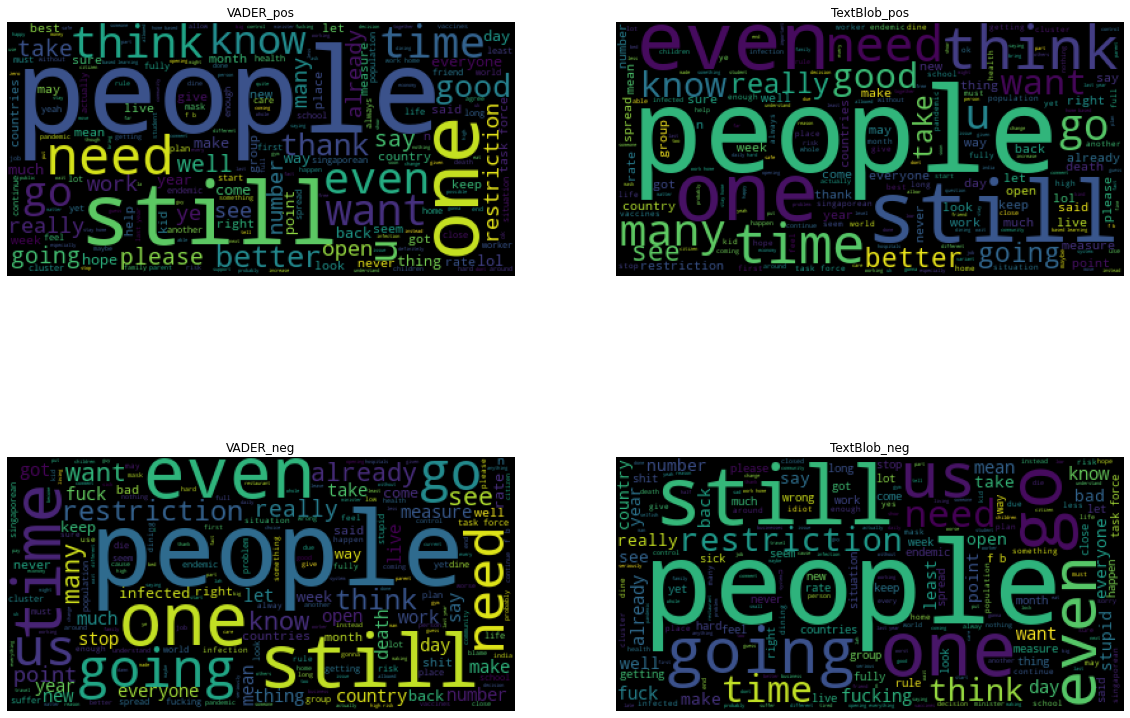

In [70]:
# Generate word clouds into one figure and exporting as PNG
from matplotlib import pyplot as plt

rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(20, 16))
plt.subplots_adjust(hspace=0)

row = 0 
col = 0 
cloud_list = [wordcloud('vader', 'pos'), wordcloud('vader', 'neg'), wordcloud('tb', 'pos'), wordcloud('tb', 'neg')]
labels_list = ['VADER_pos', 'VADER_neg', 'TextBlob_pos', 'TextBlob_neg']

for i in range(0,4):
    cloud = cloud_list[i]
    ax[row][col].imshow(cloud)
    ax[row][col].axis('off')
    ax[row][col].title.set_text(labels_list[i])
    row = row+1
    if row == rows:
        row = 0
        col = col+1

plt.savefig(f'../data/wordcloud_all.png', bbox_inches='tight')
plt.show() 

From the above, we can see that there are a lot of common words that are repeated across the word clouds and do not bear any sentiment. To produce more meaningful word clouds, I will remove non-sentiment bearing tokens among the top 300 tokens.

In [71]:
# Import top 1000 tokens in corpora
tokens_all_top1000 = pd.read_csv(path+'comments_all_tokens_top1000.csv', index_col=0)

In [72]:
# Inspect top 300 tokens
tokens_all_top300 = tokens_all_top1000['token'][0:300].tolist()
print(tokens_all_top300)

['people', 'covid', 'like', 'still', 'cases', 'vaccinated', 'get', 'go', 'one', 'even', 'time', 'us', 'need', 'think', 'back', 'singapore', 'also', 'going', 'open', 'government', 'many', 'would', 'see', 'vaccination', 'know', 'want', 'well', 'really', 'virus', 'take', 'good', 'restrictions', 'already', 'home', 'everyone', 'year', 'say', 'make', 'u', 'country', 'much', 'better', 'work', 'got', 'close', 'cb', 'day', 'point', 'let', 'measures', 'new', 'last', 'vaccine', 'lockdown', 'right', 'keep', 'countries', 'come', 'way', 'ktv', 'risk', 'please', 'never', 'stay', 'said', 'govt', 'since', 'long', 'end', 'can', 'not', 'next', 'safe', 'high', 'n', 'endemic', 'case', 'stop', 'first', 'dine', 'world', 'yet', 'fully', 'sg', 'spread', 'sure', 'may', 'population', 'phase', 'b', 'life', 'rate', 'situation', 'getting', 'school', 'lol', 'hope', 'weeks', 'care', 'live', 'icu', 'na', 'another', 'must', 'numbers', 'give', 'every', 'look', 'f', 'done', 'enough', 'mask', 'kids', 'group', 'workers', '

Among the top 300 tokens, we can see that apart from some sentiment-bearing tokens (e.g. 'good', 'better', 'sure') the rest are not as meaningful and so can be removed. I will create a list of tokens to keep among these tokens and remove the remaining as stop words.

In [73]:
tokens_keep = ['good', 'better', 'new', 'safe', 'hope', 'infected', 'enough', 
               'risk', 'fucking', 'die', 'bad', 'hard', 'thanks', 'help', 
               'best', 'fuck', 'shit', 'thank', 'normal', 'stupid',
               'wrong', 'problem', 'death', 'blame', 'suffer']

tokens_sw_top = [t for t in tokens_all_top300 if t not in tokens_keep]

In [74]:
# Function for removing top occuring tokens
def remove_sw_top(text):
    text_filtered = [word for word in text.split() if not word in tokens_sw_top] 
    text_filtered = ' '.join(text_filtered) 
    return(text_filtered)

In [75]:
# Apply functions to DataFrame
all_score['text_filtered'] = all_score.text_filtered.apply(remove_sw_top)
display(all_score.head())

,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb,text_clean_wc,text_filtered
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,-0.2960,0.000000,all my plans are gone no,plans gone
1,gww5jfz,&gt; This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31.\n\nImportant to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,-0.2462,0.208333,this means people will no longer be allowed to digitally check in by scanning a venue's safeentry qr code with their phone camera or the singpass app from may scanning of barcodes on personal identification cards to check in to venues will still be allowed until may important to take note,longer digitally check scanning venue's safeentry qr code phone camera singpass app scanning barcodes personal identification cards check venues important note
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah shag,phase 2 lai liao wah tired,-0.4404,-0.400000,phase lai liao wah tired,lai wah tired
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. \n\nEveryone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. \n\nFuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit",-0.9668,-0.244444,government fucks up and takes it out on the population again no changes for workplaces obviously but everyone else gets fucked everyone who said during raya last year lock down this year to celebrate next year was a fucking liar fuck this shit,fucks takes changes workplaces obviously gets fucked celebrate fucking liar fuck shit
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,0.0772,-0.100000,gyms also closed till th pepehands i just want to rock climb,gyms th pepehands rock climb


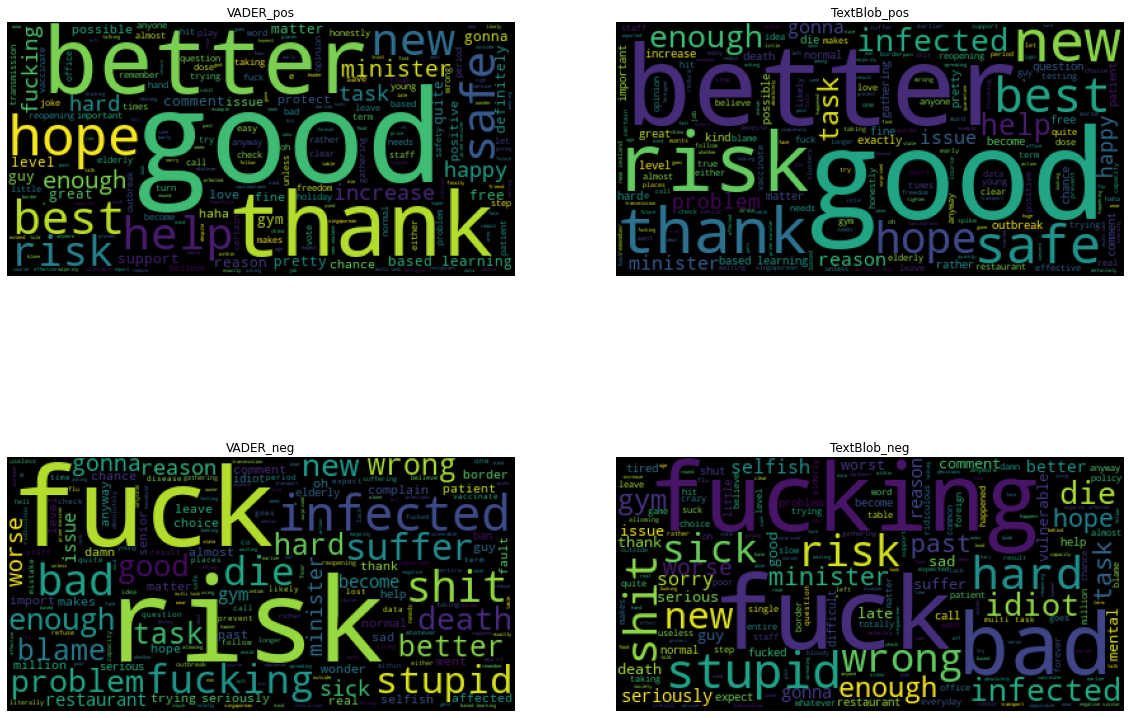

In [76]:
# Generating new word clouds and exporting as PNG
rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(20, 16))
plt.subplots_adjust(hspace=0)

row = 0 
col = 0 
cloud_list = [wordcloud('vader', 'pos'), wordcloud('vader', 'neg'), wordcloud('tb', 'pos'), wordcloud('tb', 'neg')]
labels_list = ['VADER_pos', 'VADER_neg', 'TextBlob_pos', 'TextBlob_neg']

for i in range(0,4):
    cloud = cloud_list[i]
    ax[row][col].imshow(cloud)
    ax[row][col].axis('off')
    ax[row][col].title.set_text(labels_list[i])
    row = row+1
    if row == rows:
        row = 0
        col = col+1

plt.savefig(f'../data/wordcloud_all_remove_sw.png', bbox_inches='tight')
plt.show() 

From the final word clouds, VADER and TextBlob both seem to generally capture the positive and negative sentiments adequately. There are some exceptions - for instance, VADER picks up on 'hard' and TextBlob picks up on 'infected' for positively-scored comments, while VADER picks up on 'better' and TextBlob picks up on 'hope' for negatively-scored comments. 

Nonetheless, it is premature to conclude from the word clouds alone whether VADER or TextBlob is a more accurate sentiment analyser, as the word clouds only show the highest frequency words in each corpora without contextual clues. All we can conclude is that both algorithms are generally reliable and the output polarity scores from both algorithms can be used for further analysis. We need a more granular and detailed inspection of the output of both algorithms to compare and evaluate their performance.

### Comparing top negative and top positive comments across algorithms

Given that word clouds were not granular or informative enough for us to compare the relative performance of the algorithms, I will inspect the top 10 positive and negatively rated comments for each algorithm to see how accurately the comments have been classified. 

In [77]:
# Get top 10 positive comments for VADER
vader_pos_top10 = all_score.loc[all_score['score_vader']>0, ['comment_id', 'text_replaced', 'score_vader', 'score_tb']].sort_values(by='score_vader', ascending=False).head(10)
display(vader_pos_top10)

,comment_id,text_replaced,score_vader,score_tb
6600,hbqeykk,"Again, you’re lost for words and have nothing but the past to live in. BONO! 7 LAPS! MY TIRES! THEYRE SO FAST! HES SO LUCKY WITH “TRAFFIC” 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 Looooois you legend GET IN THERE M8",0.9988,0.149917
6556,hbkoavg,"I respect your opinion, but I don't agree. I don't know which nationality you are, but one thing I've noticed in this last year and half is that our opinions are strictly biased on our culture. To Western people, the overprotection that Asian countries are applying is ""too much"" from our point of view, because we're not used to it. We've literally grown up like spoiled child, at the base of our laws there's the freedom of doing and saying whatever we want (of course with so many cons 😅) and so to us is very difficult to accept the idea that being caged in 700km² island (especially this, we come from places where you take your car and ride for hundreds of kilometres without trespassing the borders so a 30km wide island is a bit tight to us) is the only way to be free now. That's why in the Western countries it's been so difficult to make people accept that they must wear a mask or stay at home during lockdowns. One thing I appreciate instead about Asian countries is the respect of the laws. I love Singapore, I wish I could never live in another country (well, Japan is my only alternative 🤣), I love the fact I can go out alone at night and no one would bother me, I love the kindness of people, I love the multicultural society, I love the fact that everything works as it should work. But this ""amazingness"" has also a ""dark side"", which I think (correct me if I'm wrong) is not so dark for Singaporeans (or Hongkongers, Japanese, Chinese...) who have a completely different mindset, and this dark side is the fact that many of us are paying a salty price to stay safe. We've been away from our relatives outside Singapore for more than a year (and the opposite: people locked outside Singapore not seeing their children, wives or husbands); we've been accepting contact tracing despite our idea of freedom (try to do something like Trace Together in Europe and then you'll see the protests, it already happened in Italy with the Green Pass - and with our contact tracing app which is not used at all because people decided they didn't want to use it); we accepted the fact that they can come to our place and make us pack up our stuff in five minutes just to be moved in a facility with other strangers even if we are barely positive (in Europe something like that is UNIMAGINABLE, probably it'll make start WWIII 😅). We live in the fear that we can't even get some sun tan alone on the beach without the mask, because SDAs are always around... It's really tough for someone who comes from a different culture and mindset. 😔 I respected all the laws of course, I really believe in the society Singapore has built over the years, but I have to admit that's been hard for me and my mental health has started to crack at some point. Then, I've seen the way Europe is managing the Covid emergency and I've understood that another reality is possible, that at least we can get closer to the idea of ""normal"" we had before all of this happened. Singapore is not even close to normal, not even on the way. From outside, Singapore (and other Asian countries as well) is stuck at March 2020, and this hurts so much. Reading that having reached the target of 80% and seeing that nothing is going to change anytime soon, feels a bit like being cheated by someone you truly trust. That's it, sorry for the vent 😔",0.9979,0.013327
6598,hbqblkj,"He tried to change the quote and replace Loois with maximum 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 never stop, LOOOOOIS GET IN THERE YAAAAAASS M8",0.9976,0.000000
8555,hhczheo,"Our 💬 message 💬 has always 🤦‍♀️been very 🔮clear 🔮 and 🧐unambiguous🧐. We 👩‍👩‍👦‍👦 👩‍👩‍👦‍👦 are 👉 👉 well 😊on 🚄track 🐾👣⏮️🔀 🛤️ to Stage 🎦 🎦 A 🅰️of our 😉very 😜🏋️concrete 💪and well thought 💭 

Among the top 10 positive comments, 7 have been accurately identified as positive. Among the 3 incorrectly classified ones, 2 were long complex comment with mixed sentiment expressed but still with an overall negative slant, while 1 used the laughing emoji in a sarcastic manner. Nonetheless, VADER seems to be able to identify sentiment even in the context of long complex comments without just categorising them brutely as neutral, and is able to identify positive comments to some extent.

In [78]:
# Get top 10 negative comments for VADER
vader_neg_top10 = all_score.loc[all_score['score_vader']<0, ['comment_id', 'text_replaced', 'score_vader', 'score_tb']].sort_values(by='score_vader').head(10)
display(vader_neg_top10)

,comment_id,text_replaced,score_vader,score_tb
10725,3987366048019553,"COVID IS JUST THE TIPPING POINT CAUSING MASS DEATHS Each and every organ in our body is already very weakened and severely underperforming due to the contaminated air, food, water, mind, . as follows. So our bodies are the ideal places for any virus or disease to easily finish whatever meager health is remaining in our bodies and thus kill us within no time. But still we don't want to give up the below 7 killers of ours. We are just trying to patch up the symptoms when it is already too late while totally ignoring the following root causes of it all. 1. So much pollution in the air which we take in into our lungs every single day in massive proportions. 2. All the pesticides and other dosha-imbalanci ng items in our food which are eating us up from within day after day. 3. All the artificial and poisonous chemical medicines, drugs, steroids, opioids, . which we have dumped into our bodies for decades and thus totally destroyed our own immune system and resistance power totally. 4. All the carcinogenic electromanetic, radio frequency, . radiations and the mental junk and fantasies which all our bodily organs and mind are being constantly microwaved with in this technological age. 5. Mass-scale hatred and violence being inflicted on each other at the drop of the hat. 6. Nature's fury in the name of natural calamities because we are so cruelly exploiting nature to the very hilt for our own greedy and selfish ends. 7, And finally our toxic lust which we indulge in regularly causing the colossal loss and depletion of our seventh dhatu, the very essence of all what we eat, drink, and breathe. This renders all our other 6 dhatus (plasma, blood, muscle, adipose, bones, and marrow) weak and our immune system extremely susceptible to the slightest disease. The animals which engage in the most lust have the shortest lifespans and those who engage the least in lust have the longest lifespans. patanam bindu maranat, rakshanam bindu jivanat. These 7 are the precise reasons why Srimad Bhagavatam states that people will literally become like dwarfs in primitive villages massacred by their cruel monarchical rulers and eventually live only for a maximum of 15 years as Kaliyuga progresses and ends after 427,000 years. kamala jala dala, jivana talamala, chapala sukha laba lagi re...",-0.9968,-0.018467
4160,h5umjml,"As expected, the government has decided to swing back to the n-th encore of Phase 2. I don't care if this is selfish of me to say, but god send help because I am hella fatigued with this nonsense... Edit/Add-on: Again, this is a selfish and personal take, but I'm sick of how our age group is losing our youth and ""hustling time"" to COVID because of some dumb YPs, anti-vaccine boomers, ham sup los, worsening the COVID situation. (I know the reality is not as simple as that, but that's certainly how shit feels. Makes me want to be immature and throw a tantrum a little!) And not to mention all the harm caused to businesses and employees... The government keeps saying they will provide the relevant financial aid, but they always make the process exceedingly convoluted, as if it were trying to deny your application at every step of the way. Even when I helped my parents apply for stuff like the CRG, all we got was ministry A saying ministry B didn't have the documents we sent them, and hence the application will be rejected and we'll have to start all over. Grrr I just wanna be so paggro rn! Like maybe my whole family is illiterate and can't fill up simple forms ah. Maybe we're just stupid; maybe we can't follow simple instructions; maybe that's why we're earning <2k per month and getting fricked by COVID ah. The bush warbler's call is heard first in the morn, but with no worm to bring back to the nest, the bush warbler's call turns to scorn, as any early birds too starve along with the rest. Also. Can't imagine how much it must SUCK to be a business owner in 2021...",-

The top negative comments seem to all have been correcty classified as negative; the comments themselves are also rather complex so VADER has done a good job in capturing the negative sentiment even in such nuanced and complex contexts. VADER also seems to have detected negative sentiment expressed in ALL CAPS text and emojis.

In [79]:
# Get top 10 positive comments for TextBlob
tb_pos_top10 = all_score.loc[all_score['score_tb']>0, ['comment_id', 'text_replaced', 'score_tb', 'score_vader']].sort_values(by='score_tb', ascending=False).head(10)
display(tb_pos_top10)

,comment_id,text_replaced,score_tb,score_vader
2372,gy3o74u,I have one at home man!!! It's the best for use after post-mclaosai,1.0,0.7249
9274,10157877612027115,"Guess China's the best place to be now, in this reinvigorated pandemic! 😅🤣😂",1.0,0.9474
11380,10158300055547934,That is excellent !,1.0,0.6114
3329,h1yi2lv,I didnt say they weren't. They just arent a fool proof plan even if they're the best preventive measure for at-risk groups and the government needs to realise this and not hope for a fantasy drug that will prevent 100%,1.0,0.6486
4175,h5umpye,2021 best year /s,1.0,0.6369
12734,10158023189072115,"Best to have cctv link fm these establishments who converted to Food & Beverage to the police, this way no way to hanky panky.",1.0,0.4588
15625,10158187380577115,Love it!!!!,1.0,0.7482
8036,hhckw3t,Best summary ever,1.0,0.6369
13622,10158111135877115,splendid!,1.0,0.6239
13619,10158111248747115,Best Options,1.0,0.6369


Compared to VADER, TextBlob seems to capture sentiment only in very short comments, which could indicate a less nuanced/sophisiticated sentiment classification, and seems to assign extreme values like 1.0 easily just by seizing on words like 'best' and 'good'.

In [80]:
# Get top 10 negative comments for TextBlob
tb_neg_top10 = all_score.loc[all_score['score_tb']<0, ['comment_id', 'text_replaced', 'score_tb', 'score_vader']].sort_values(by='score_tb').head(10)
display(tb_neg_top10)

,comment_id,text_replaced,score_tb,score_vader
9539,10158274326557934,All these happening now because singapore is govern by a bunch of idiots period!!!,-1.0,0.0000
15247,10158583438602934,"We must get a to the end of this evil situation, by his grace",-1.0,-0.5346
8798,hhdjr62,With 3k cases per day and 5.6M Singapore population it will take 5 years for everyone to get Covid and be done with it. So I guess that’s the worst case scenario timeframe.,-1.0,-0.6249
3260,h1ydn6k,Ty is so insane,-1.0,-0.1010
6463,hbhmez0,I agree. But all Covid has done is show you guys what you should have already seen. This class system with migrants at the bottom is disgusting.,-1.0,-0.5927
14383,10158532486527934,Doing worst than 1 year ago ... look at china now,-1.0,-0.6249
12787,10158023285912115,I wish nothing but the worst for these pple,-1.0,0.7423
1195,gy2gmzu,Lawrence wong has been horrible at managing this from the start,-1.0,-0.5423
6331,hbg1ter,The amount of youthful naviety and taking policy announcements at face value is shocking.,-1.0,0.2500
12680,10158423322472934,IDIOT!!!!,-1.0,-0.6671


Like the top positive comments, the top negative comments here are also all very short and seem to have been categorised based on simple keywords like 'idiot', 'evil' and 'horrible, without much other nuance in the comment. 

Overall, comparing TextBlob and VADER, it seems that TextBlob performs very well in detecting sentiment in shorter comments, while VADER is much better at detecting sentiment in longer sentences (albeit being better at detecting negative than positive sentiment). Nonetheless, this comparison is still insufficient to conclude which algorithm is more accurate than the other. Even comparing both algorithm's scores on the same comments, both algorithms mostly agree with each other on polarity orientation (positive/negative) and only differ in sentiment intensity, which can differ because the algorithms capture different features. To further compare the two algorithms, I will manually annotate the comments and see how both algorithms perform against the gold-standard human-verified scoring.

### Comparing algorithm results against human annotation

My manual annotation serves as the gold standard scoring to be compared against VADER and TextBlob. Apart from making sure to consider capitalisation, punctuation and emojis in my scoring, my human annotation has the added advantage of being able to capture sentiment expressed by Singlish given that I am a native speaker of English. As such, I will score based on the `text_cleaned_sa` column, which does not translate Singlish/domain-specific terms.

To ensure as much consistency with the algorithm scoring as possible, I will maintain the same scoring scale of -1 to 1, and also with with nuance such that there are 4 degrees of negativity (Slightly Negative = -0.25, Moderately Negative = -0.5, Very Negative = -0.75, Extremely Negative = -1.0), 4 degrees of positivity (Slightly Positive = 0.25, Moderately Positive = 0.5, Very Positive = 0.75, Extremely Positive = 1.0). Comments with mixed or indifferent sentiment will be scored 0. I will score the comments twice and take the average of both scores to improve consistency.

In [81]:
# Obtain random sample of 100 scored comments
import random
import numpy as np
random.seed(0)

all_score_ids = random.sample(list(all_score['comment_id']), 100)
all_score_sample = all_score[all_score.comment_id.isin(all_score_ids)]
all_score_sample = all_score_sample[['comment_id', 'text_clean_sa', 'text_replaced', 'score_vader', 'score_tb']]

display(all_score_sample.head())

,comment_id,text_clean_sa,text_replaced,score_vader,score_tb
18,gww7c37,Amazing 4G leadership! Please call for an elections again this year because I am very sure a lot of people will wanna vote for you all and give you the well deserving mandate! So proud to have smart leaders like you all!!!,Amazing 4G leadership! Please call for an elections again this year because I am very sure a lot of people will wanna vote for you all and give you the well deserving mandate! So proud to have smart leaders like you all!!!,0.9645,0.673705
230,gwwcy7z,"I'll give our stupid govt full credit instead. Whatever happens in other countries is out of our control, but what's within our control is our response to what happens in other countries and our govt had to fuck it up, all in the name of eCoNoMy","I'll give our stupid government full credit instead. Whatever happens in other countries is out of our control, but what's within our control is our response to what happens in other countries and our government had to fuck it up, all in the name of eCoNoMy",-0.7311,-0.220000
663,gwxbqug,"Go back to phase 2, but more flights are arriving! Song boh?","Go back to phase 2, but more flights are arriving! Song boh?",0.0000,0.312500
1020,gy2fd76,"time for the ""Containing Crowd Battle"" to start, sayonara F&B businesses","time for the ""Containing Crowd Battle"" to start, sayonara F&B businesses",-0.3818,0.000000
1031,gy2fgim,>own up to your mistakes PAP? Admit that they are wrong? HAHAHAHAHAHA,>own up to your mistakes People's Action Party? Admit that they are wrong? HAHA,0.4576,-0.066667


In [82]:
# Export scored comments to CSV for manual annotation
all_score_sample.to_csv(path+'comments_all_score_sample.csv', header=True, index=True, encoding='utf-8-sig')

In [83]:
# Import and inspect manually scored comments
all_score_sample = pd.read_csv(path+'comments_all_score_sample.csv', index_col=0, dtype={'comment_id': 'str'})
all_score_sample = all_score_sample[['comment_id', 'text_clean_sa', 'text_replaced', 'score_vader', 'score_tb', 'score_human_avg']]
all_score_sample.head()

,comment_id,text_clean_sa,text_replaced,score_vader,score_tb,score_human_avg
18,gww7c37,Amazing 4G leadership! Please call for an elections again this year because I am very sure a lot of people will wanna vote for you all and give you the well deserving mandate! So proud to have smart leaders like you all!!!,Amazing 4G leadership! Please call for an elections again this year because I am very sure a lot of people will wanna vote for you all and give you the well deserving mandate! So proud to have smart leaders like you all!!!,0.9645,0.673705,-0.375
230,gwwcy7z,"I'll give our stupid govt full credit instead. Whatever happens in other countries is out of our control, but what's within our control is our response to what happens in other countries and our govt had to fuck it up, all in the name of eCoNoMy","I'll give our stupid government full credit instead. Whatever happens in other countries is out of our control, but what's within our control is our response to what happens in other countries and our government had to fuck it up, all in the name of eCoNoMy",-0.7311,-0.220000,-0.500
663,gwxbqug,"Go back to phase 2, but more flights are arriving! Song boh?","Go back to phase 2, but more flights are arriving! Song boh?",0.0000,0.312500,-0.500
1020,gy2fd76,"time for the ""Containing Crowd Battle"" to start, sayonara F&B businesses","time for the ""Containing Crowd Battle"" to start, sayonara F&B businesses",-0.3818,0.000000,-0.500
1031,gy2fgim,>own up to your mistakes PAP? Admit that they are wrong? HAHAHAHAHAHA,>own up to your mistakes People's Action Party? Admit that they are wrong? HAHA,0.4576,-0.066667,-0.500


To compare VADER/TextBlob's performance against human scoring, I will first look at the polarity differences in scoring as I believe that is more important than differences in magnitude. I will indicate this difference in a new column `polarity_diff_vader/tb`. The value for this column will be 0 if the algorithm and human scores have the same polarity (including if both gave a neutral score of 0), and 1 if the polarity is different.

In [84]:
# Define function that compares scores and determines polarity difference
def polarity_diff(x, y):
    if (x==0 and y==0):
        return(0)
    elif (x*y > 0):
        return(0)
    else:
        return(1)

In [85]:
# Apply function to dataframe
all_score_sample['polarity_diff_vader'] = all_score_sample.apply(lambda x: polarity_diff(x.score_vader, x.score_human_avg), axis=1)
all_score_sample['polarity_diff_tb'] = all_score_sample.apply(lambda x: polarity_diff(x.score_tb, x.score_human_avg), axis=1)

In [86]:
# Show function with new polarity_diff columns
all_score_sample.head()

,comment_id,text_clean_sa,text_replaced,score_vader,score_tb,score_human_avg,polarity_diff_vader,polarity_diff_tb
18,gww7c37,Amazing 4G leadership! Please call for an elections again this year because I am very sure a lot of people will wanna vote for you all and give you the well deserving mandate! So proud to have smart leaders like you all!!!,Amazing 4G leadership! Please call for an elections again this year because I am very sure a lot of people will wanna vote for you all and give you the well deserving mandate! So proud to have smart leaders like you all!!!,0.9645,0.673705,-0.375,1,1
230,gwwcy7z,"I'll give our stupid govt full credit instead. Whatever happens in other countries is out of our control, but what's within our control is our response to what happens in other countries and our govt had to fuck it up, all in the name of eCoNoMy","I'll give our stupid government full credit instead. Whatever happens in other countries is out of our control, but what's within our control is our response to what happens in other countries and our government had to fuck it up, all in the name of eCoNoMy",-0.7311,-0.220000,-0.500,0,0
663,gwxbqug,"Go back to phase 2, but more flights are arriving! Song boh?","Go back to phase 2, but more flights are arriving! Song boh?",0.0000,0.312500,-0.500,1,1
1020,gy2fd76,"time for the ""Containing Crowd Battle"" to start, sayonara F&B businesses","time for the ""Containing Crowd Battle"" to start, sayonara F&B businesses",-0.3818,0.000000,-0.500,0,1
1031,gy2fgim,>own up to your mistakes PAP? Admit that they are wrong? HAHAHAHAHAHA,>own up to your mistakes People's Action Party? Admit that they are wrong? HAHA,0.4576,-0.066667,-0.500,1,0


In [87]:
# Sum the differences
print('Sum of polarity differences between VADER and human scoring: {}'.format(all_score_sample.polarity_diff_vader.sum()))
print('Sum of polarity differences between TextBlob and human scoring: {}'.format(all_score_sample.polarity_diff_tb.sum()))

Sum of polarity differences between VADER and human scoring: 45
Sum of polarity differences between TextBlob and human scoring: 59


Given that a value of 0 indicates a polarity match and 1 indicates a polarity mismatch for each comment, the algorithm with the higher score is less accurate relative to the gold standard human scorer. 

From the above TextBlob has 14 more comments than VADER where there was a polarity mismatch with the human scorer. This means that VADER has $(59-45)/45*100\%$ = $31.1\%$ higher accuracy relative to the gold standard than TextBlob.

Now that I have evalauted the polarity differences, I will compare the difference in magnitude of scores to see which algorithm scores more closely to the human scorer.

In [89]:
# Compare VADER/TextBlob and human scoring by taking absolute difference in scores
all_score_sample['score_diff_vader'] = (all_score_sample['score_vader'] - all_score_sample['score_human_avg']).abs().round(4)
all_score_sample['score_diff_tb'] = (all_score_sample['score_tb'] - all_score_sample['score_human_avg']).abs().round(4)

display(all_score_sample.head())

,comment_id,text_clean_sa,text_replaced,score_vader,score_tb,score_human_avg,polarity_diff_vader,polarity_diff_tb,score_diff_vader,score_diff_tb
18,gww7c37,Amazing 4G leadership! Please call for an elections again this year because I am very sure a lot of people will wanna vote for you all and give you the well deserving mandate! So proud to have smart leaders like you all!!!,Amazing 4G leadership! Please call for an elections again this year because I am very sure a lot of people will wanna vote for you all and give you the well deserving mandate! So proud to have smart leaders like you all!!!,0.9645,0.673705,-0.375,1,1,1.3395,1.0487
230,gwwcy7z,"I'll give our stupid govt full credit instead. Whatever happens in other countries is out of our control, but what's within our control is our response to what happens in other countries and our govt had to fuck it up, all in the name of eCoNoMy","I'll give our stupid government full credit instead. Whatever happens in other countries is out of our control, but what's within our control is our response to what happens in other countries and our government had to fuck it up, all in the name of eCoNoMy",-0.7311,-0.220000,-0.500,0,0,0.2311,0.2800
663,gwxbqug,"Go back to phase 2, but more flights are arriving! Song boh?","Go back to phase 2, but more flights are arriving! Song boh?",0.0000,0.312500,-0.500,1,1,0.5000,0.8125
1020,gy2fd76,"time for the ""Containing Crowd Battle"" to start, sayonara F&B businesses","time for the ""Containing Crowd Battle"" to start, sayonara F&B businesses",-0.3818,0.000000,-0.500,0,1,0.1182,0.5000
1031,gy2fgim,>own up to your mistakes PAP? Admit that they are wrong? HAHAHAHAHAHA,>own up to your mistakes People's Action Party? Admit that they are wrong? HAHA,0.4576,-0.066667,-0.500,1,0,0.9576,0.4333


In [90]:
# Sum the differences
print('Sum of differences between VADER and human scoring: {:.4f}'.format(all_score_sample.score_diff_vader.sum()))
print('Sum of differences between TextBlob and human scoring: {:.4f}'.format(all_score_sample.score_diff_tb.sum()))

Sum of differences between VADER and human scoring: 38.8847
Sum of differences between TextBlob and human scoring: 40.4723


The greater the magnitude difference between the algorithm scores and human scores, the less accurate the algorithm. Since TextBlob has a slightly higher total magnitude difference of 40 compared to VADER which has 39, TextBlob is slightly less accurate than VADER, but this difference is marginal.

Nonetheless, bearing in mind the polarity differences I compared earlier which are more important than the magnitude differences, I can still conclude that TextBlob is relatively less accurate than VADER in this sentiment analysis task.